## Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [4]:
# Loading dataset
df=pd.read_csv("retail_sales_mini_eda.csv")
df.head(2)

,order_id,order_date,delivery_date,customer_id,segment,city,state,product_category,product_subcategory,quantity,discount,price_after_discount,payment_method,is_returned,shipping_days,total_sales
0,ORD100000,2024-11-13,2024-11-18,CUST2895,Consumer,Delhi,Delhi,Fashion,Jeans,1,0.1,577.92,Credit Card,0,5,577.92
1,ORD100001,2024-10-28,2024-10-29,CUST4389,Consumer,Indore,Madhya Pradesh,Beauty & Personal Care,Shampoo,2,0.1,1304.60,Cash on Delivery,0,1,2609.20


# Data Preprocessing

In [4]:
#shape
df.shape

(1515, 16)

In [25]:
#dtype
df.dtypes

order_id                        object
order_date              datetime64[ns]
delivery_date           datetime64[ns]
customer_id                     object
segment                         object
city                            object
state                           object
product_category                object
product_subcategory             object
quantity                         int64
discount                       float64
price_after_discount           float64
payment_method                  object
is_returned                      int64
shipping_days                    int64
total_sales                    float64
dtype: object

In [8]:
#summary
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1515,1500,ORD100180,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_date,1515,470,2024-01-05,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
delivery_date,1515,551,2025-02-01,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_id,1515,1385,CUST6710,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
segment,1515,4,Corporate,387,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,1495,12,Ahmedabad,141,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,1515,11,Maharashtra,251,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_category,1515,5,Grocery,327,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_subcategory,1495,25,Kurta,76,NaN,NaN,NaN,NaN,NaN,NaN,NaN
quantity,1515.0,NaN,NaN,NaN,2.938614,1.389547,1.0,2.0,3.0,4.0,5.0


In [39]:
#missing values 
df.isnull().sum()

order_id                 0
order_date               0
delivery_date            0
customer_id              0
segment                  0
city                     0
state                    0
product_category         0
product_subcategory     20
quantity                 0
discount                 0
price_after_discount     0
payment_method          20
is_returned              0
shipping_days            0
total_sales              0
dtype: int64

In [28]:
#Duplicates
df.duplicated().sum()

np.int64(0)

In [27]:
# handling duplicates
df=df.drop_duplicates()

In [46]:
df.isnull().sum()

order_id                 0
order_date               0
delivery_date            0
customer_id              0
segment                  0
city                     0
state                    0
product_category         0
product_subcategory     20
quantity                 0
discount                 0
price_after_discount     0
payment_method           0
is_returned              0
shipping_days            0
total_sales              0
dtype: int64

In [18]:
#correcting dtypes
# ensure datetime
df["order_date"]=pd.to_datetime(df["order_date"],errors="coerce")

In [20]:
df["delivery_date"]=pd.to_datetime(df["delivery_date"],errors="coerce")

### filling null values

In [38]:
df["city"].isna().sum()

np.int64(0)

In [32]:
prob=df["city"].value_counts(normalize=True)

In [34]:
prob.index

Index(['Ahmedabad', 'Kolkata', 'Lucknow', 'Pune', 'Indore', 'Delhi',
       'Bengaluru', 'Chennai', 'Chandigarh', 'Mumbai', 'Hyderabad', 'Jaipur'],
      dtype='object', name='city')

In [35]:
prob.values

array([0.09527027, 0.09121622, 0.09054054, 0.08851351, 0.08648649,
       0.08648649, 0.08378378, 0.07905405, 0.07837838, 0.07567568,
       0.075     , 0.06959459])

In [36]:
fillers=np.random.choice(prob.index,df["city"].isnull().sum(),p=prob.values)

In [37]:
df.loc[df["city"].isnull(),"city"]=fillers

###-----------------------------------------###

In [45]:
df["payment_method"].isna().sum()

np.int64(0)

In [42]:
probo=df["payment_method"].value_counts(normalize=True)

In [43]:
fillers=np.random.choice(probo.index,df["payment_method"].isnull().sum(),p=probo.values)

In [44]:
df.loc[df["payment_method"].isnull(),"payment_method"]=fillers

###-----------------------------------------###

In [53]:
df["product_subcategory"].isna().sum()

np.int64(0)

In [50]:
probob=df["product_subcategory"].value_counts(normalize=True)

In [51]:
fillers=np.random.choice(probob.index,df["product_subcategory"].isnull().sum(),p=probob.values)

In [52]:
df.loc[df["product_subcategory"].isnull(),"product_subcategory"]=fillers

###-----------------------------------------###

In [54]:
df.isnull().sum()

order_id                0
order_date              0
delivery_date           0
customer_id             0
segment                 0
city                    0
state                   0
product_category        0
product_subcategory     0
quantity                0
discount                0
price_after_discount    0
payment_method          0
is_returned             0
shipping_days           0
total_sales             0
dtype: int64

# handling outliers

In [22]:
# total_sales

In [24]:
Q1 = df['total_sales'].quantile(0.25)
Q1

np.float64(2263.79)

In [25]:
Q3 = df['total_sales'].quantile(0.75)
Q3

np.float64(34449.135)

In [28]:
IQR = Q3 - Q1
IQR

np.float64(32185.345)

In [30]:
low=Q1-IQR*1.5
low

np.float64(-46014.2275)

In [31]:
high=Q3+IQR*1.5
high

np.float64(82727.1525)

In [32]:
# outliers
df.loc[(df['total_sales'] < low) | (df['total_sales']> high)]

,order_id,order_date,delivery_date,customer_id,segment,city,state,product_category,product_subcategory,quantity,discount,price_after_discount,payment_method,is_returned,shipping_days,total_sales,Z_total_sales
2,ORD100002,2024-06-27,2024-06-30,CUST8867,Consumer,Mumbai,Maharashtra,Electronics,Laptop,5,0.050000,60700.600000,Credit Card,0,3,303503.000000,3.923840
7,ORD100007,2024-05-24,2024-05-28,CUST1525,Home Office,Kolkata,West Bengal,Electronics,Headphones,4,0.000000,78283.710000,Cash on Delivery,0,4,313134.840000,4.065694
9,ORD100009,2025-01-28,2025-01-31,CUST8062,Corporate,Chandigarh,Chandigarh,Electronics,Smartphone,2,0.050000,44866.000000,Credit Card,0,3,89732.000000,0.775515
10,ORD100010,2024-03-03,2024-03-08,CUST6895,Corporate,Delhi,Delhi,Electronics,Headphones,5,0.000000,57028.700000,Debit Card,0,5,285143.500000,3.653449
12,ORD100012,2025-01-28,2025-02-05,CUST7262,Home Office,Lucknow,Uttar Pradesh,Electronics,Smartwatch,4,0.000000,33482.070000,Credit Card,1,8,133928.280000,1.426418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,ORD101475,2024-04-03,2024-04-06,CUST2539,Small Business,Indore,Madhya Pradesh,Electronics,Smartphone,2,0.000000,68431.190000,Cash on Delivery,0,3,136862.380000,1.469630
1485,ORD101485,2025-01-26,2025-01-29,CUST4381,Corporate,Lucknow,Uttar Pradesh,Electronics,Tablet,3,0.050000,38876.880000,NaN,0,3,116630.640000,1.171666
1488,ORD101488,2025-02-14,2025-02-21,CUST1080,Small Business,Bengaluru,Karnataka,Electronics,Smartwatch,5,0.000000,72750.880000,Debit Card,0,7,363754.400000,4.811196
1489,ORD101489,2024-04-27,2024-04-28,CUST2394,Consumer,Chennai,Tamil Nadu,Electronics,Smartphone,3,0.000000,34685.550000,Cash on Delivery,0,1,104056.650000,0.986482


In [33]:
df.loc[df['total_sales']> high, 'total_sales'] = high

In [35]:
len(df.loc[(df['total_sales'] < low) | (df['total_sales']> high)])

0

## Visualization

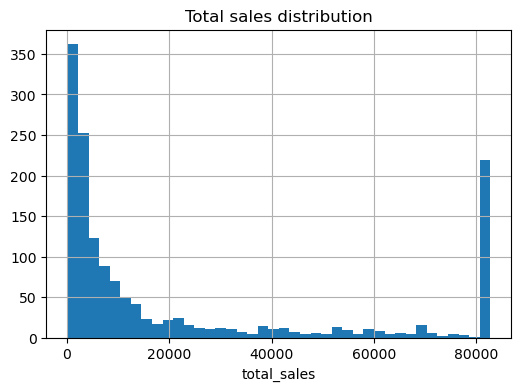

In [36]:
#total_sales
plt.figure(figsize=(6,4))
df['total_sales'].hist(bins=40)
plt.title("Total sales distribution")
plt.xlabel("total_sales")
plt.show()


<Figure size 800x500 with 0 Axes>

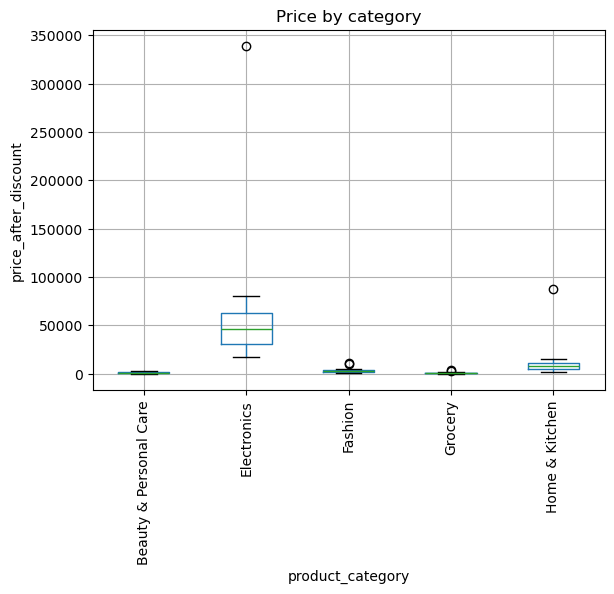

In [47]:
# Boxplot: price by product category
plt.figure(figsize=(8,5))
df.boxplot(column='price_after_discount', by='product_category',rot=90)
plt.suptitle('')
plt.title('Price by category')
plt.ylabel('price_after_discount')
plt.show()


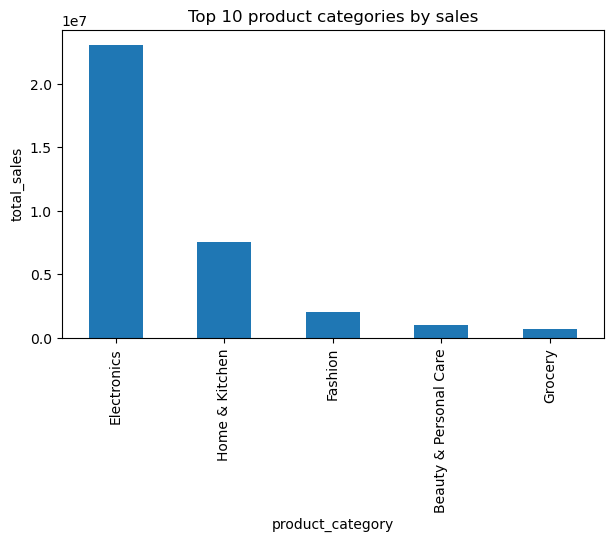

In [48]:
#top 10 product categories
top_cat = df.groupby('product_category')['total_sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(7,4))
top_cat.plot(kind='bar')
plt.title("Top 10 product categories by sales")
plt.ylabel("total_sales")
plt.show()


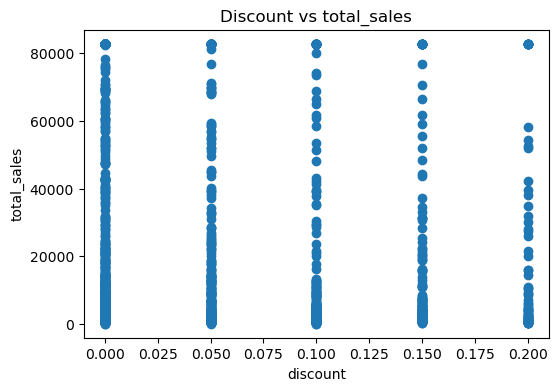

In [55]:
# discount vs total_sales
plt.figure(figsize=(6,4))
plt.scatter(df['discount'], df['total_sales'])
plt.title("Discount vs total_sales")
plt.xlabel("discount")
plt.ylabel("total_sales")
plt.show()


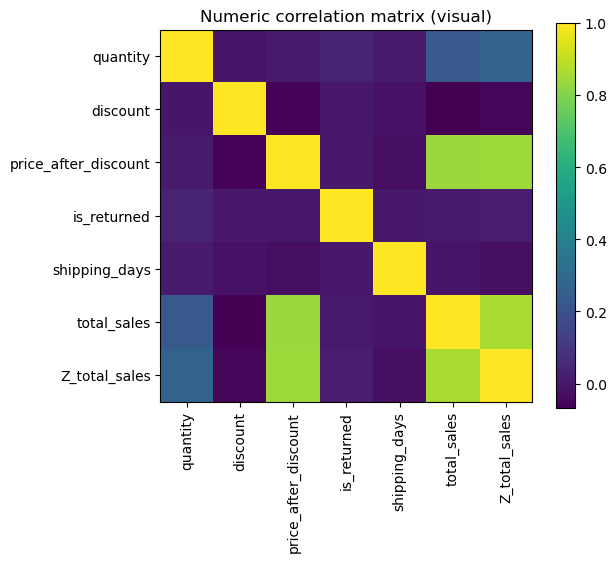

In [56]:
#Correlation heatmap 
num = df.select_dtypes(include=[np.number]).fillna(0)
corr = num.corr()
plt.figure(figsize=(6,5))
plt.imshow(corr, interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.title("Numeric correlation matrix (visual)")
plt.show()

In [57]:
#Encoding & Scaling
# one-hot Encoding
df_model = pd.get_dummies(df, columns=['payment_method','segment'], drop_first=True)

In [59]:
# label encoding 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['product_category_le'] = le.fit_transform(df['product_category'])


In [60]:
# scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['quantity_s','price_s','total_sales_s']] = scaler.fit_transform(df[['quantity','price_after_discount','total_sales']].fillna(0))

In [61]:
df.to_csv("retail_sales_cleaned.csv", index=False)

##  Findings & Insights

1. **Top Categories & Segments:**  
   - Electronics and Fashion together contribute the largest share of revenue.  
   - The **Corporate** segment has the highest average order value, while **Consumers** drive order volume.

2. **Discount Effectiveness:**  
   - Discounts above **15%** show diminishing returns — sales volume does not increase significantly, but profit margins reduce.  

3. **Returns & Product Performance:**  
   - Fashion products have the **highest return rate** (~2x higher than Electronics).  
   - Returns are concentrated in high-discounted items, indicating possible quality or expectation issues.  

4. **Time & Delivery Trends:**  
   - Sales peak in **festive months (Oct–Dec)** with spikes in Electronics.  
   - Average delivery time is ~3.5 days, but cities like **Chennai & Kolkata** face longer shipping delays (>5 days).
